In [1]:
!pip install pandas numpy scikit-learn
!pip install tensorflow
!pip install dython
!pip install -U imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
from dython.nominal import associations
from scipy.stats import ttest_ind, pointbiserialr, chi2_contingency, chi2, zscore
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from collections import Counter
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [3]:
# Load dataset
file_path = 'C:/Users/adrit/OneDrive/Documents/NTU/AI and Machine Learning/Assignment/processed.cleveland.csv'
data = pd.read_csv(file_path)

# Data Pre-processing and Visualisation

In [4]:
data.shape

(303, 14)

In [5]:
pd.DataFrame(data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [6]:
#Finding missing value
#Replacing '?' and ' ' (blank space) with np.nan
data.replace(['?', ' '], np.nan, inplace=True)

In [7]:
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='ignore')

#The count of missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [8]:
data = data.dropna()
#The count of missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [9]:
print("Basic information about the dataset:")
print(data.info())

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB
None


In [10]:
data['oldpeak'] = data['oldpeak'].astype('int64')
data['ca'] = data['ca'].astype('int64')
data['thal'] = data['thal'].astype('int64')

In [11]:
print("Basic information about the dataset:")
print(data.info())

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       297 non-null    int64
 1   sex       297 non-null    int64
 2   cp        297 non-null    int64
 3   trestbps  297 non-null    int64
 4   chol      297 non-null    int64
 5   fbs       297 non-null    int64
 6   restecg   297 non-null    int64
 7   thalach   297 non-null    int64
 8   exang     297 non-null    int64
 9   oldpeak   297 non-null    int64
 10  slope     297 non-null    int64
 11  ca        297 non-null    int64
 12  thal      297 non-null    int64
 13  num       297 non-null    int64
dtypes: int64(14)
memory usage: 34.8 KB
None


In [12]:
data.duplicated().sum()

0

In [13]:
data.shape

(297, 14)

In [14]:
pd.DataFrame(data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0,2,0,7,1
298,45,1,1,110,264,0,0,132,0,1,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1,2,1,7,3


In [15]:
#basic descriptive
pd.set_option('display.float_format', lambda x: '%.3f' %x)
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,297.000,54.542,9.050,29.000,48.000,56.000,61.000,77.000
sex,297.000,0.677,0.468,0.000,0.000,1.000,1.000,1.000
cp,297.000,3.158,0.965,1.000,3.000,3.000,4.000,4.000
trestbps,297.000,131.694,17.763,94.000,120.000,130.000,140.000,200.000
chol,297.000,247.350,51.998,126.000,211.000,243.000,276.000,564.000
fbs,297.000,0.145,0.352,0.000,0.000,0.000,0.000,1.000
restecg,297.000,0.997,0.995,0.000,0.000,1.000,2.000,2.000
thalach,297.000,149.599,22.942,71.000,133.000,153.000,166.000,202.000
exang,297.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,297.000,0.778,1.077,0.000,0.000,0.000,1.000,6.000


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'num'}>, <Axes: >, <Axes: >]],
      dtype=object)

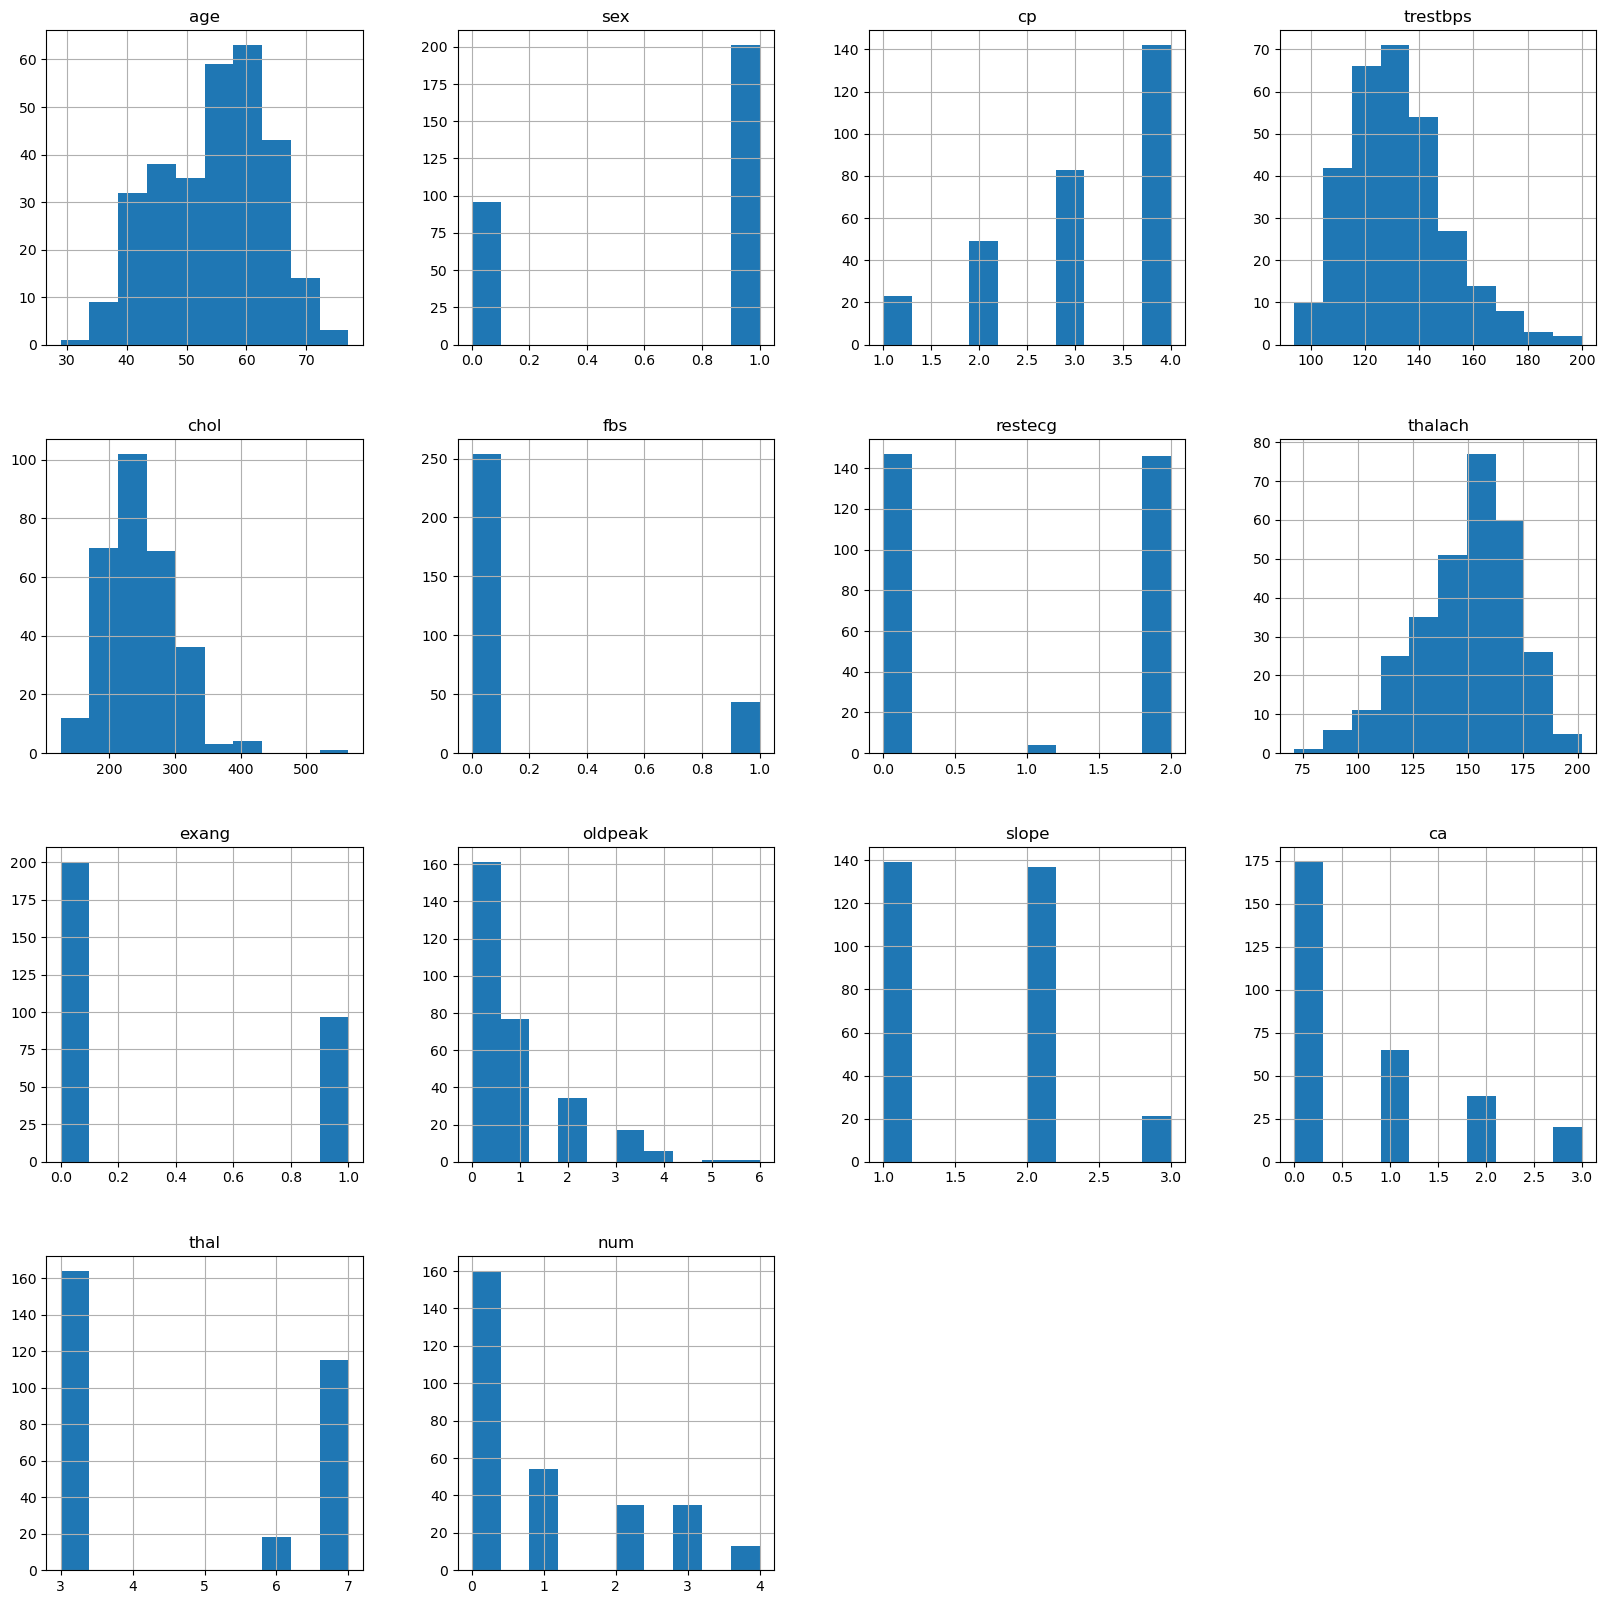

In [16]:
data.hist(figsize = (20, 20))

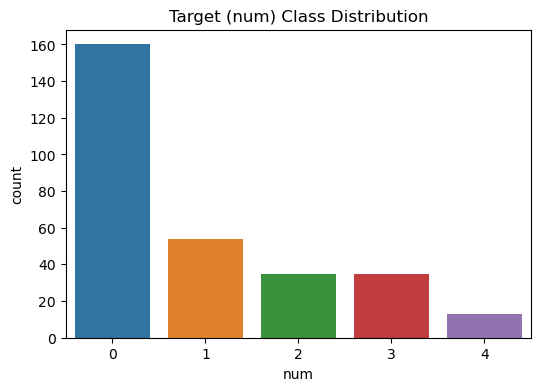

In [17]:
# Visualisation of the Distribution of Target column 'num' 
plt.figure(figsize=(6, 4))
sns.countplot(x='num', data=data)
plt.title('Target (num) Class Distribution')
plt.show()

After visualisation, it is evident that class imbalance is present in Target variable, particularly with class 4, which has only 14 data points. Since classes 3 and 4 are closely related in terms of severity risk, merging them could be beneficial. However, before proceeding with this, I need to analyse the important features of the data. By comparing these features between classes 3 and 4, I can justify the merging decision. If there is no significant difference between them, merging the two classes would be feasible.

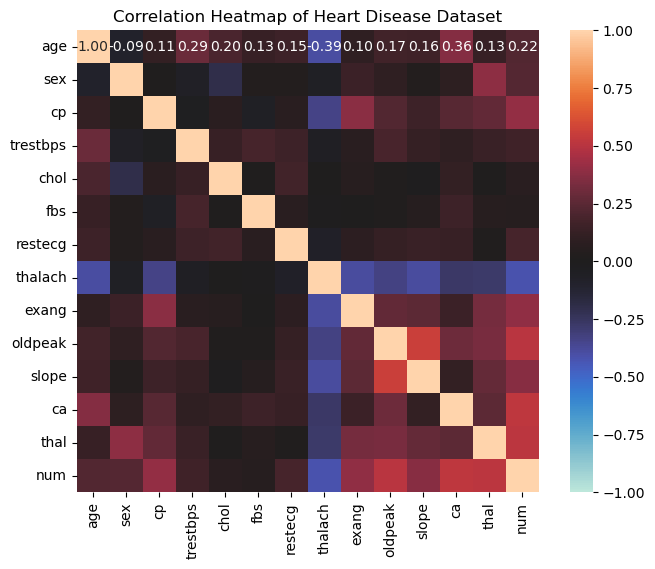

In [18]:
# Compute associations between variables and create a heatmap to identify important features. 
# I am using the dython library for this heatmap because my dataset includes both categorical and continuous variables.
corr_heatmap = associations(data, figsize=(8, 6), plot=True, title="Correlation Heatmap of Heart Disease Dataset")

Based on the heatmap visualisation, it is evident as of now that, 'cp', 'exang', 'oldpeak', 'slope', 'ca', and 'thal' have a positive correlation with the target variable 'num'. To confirm important features, further analysis is required.

# Analysing important feature variables

In [19]:
# Separate features and target
X = data.drop(['num'], axis=1)
y = data['num']

In [20]:
# Identifying continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# Identifying categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

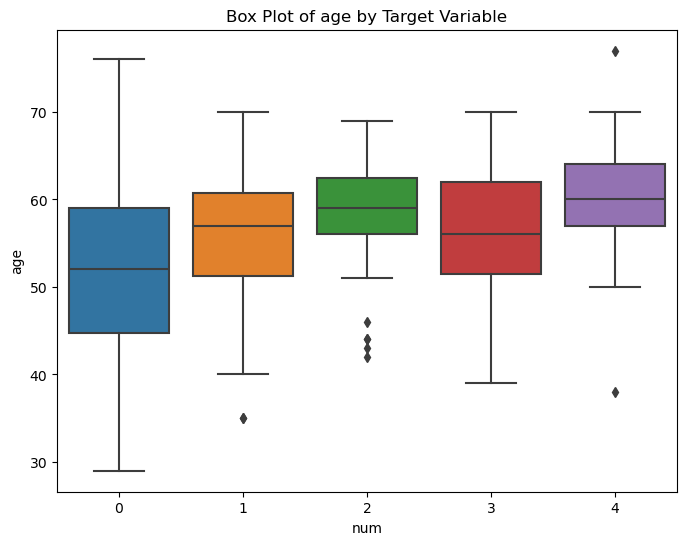

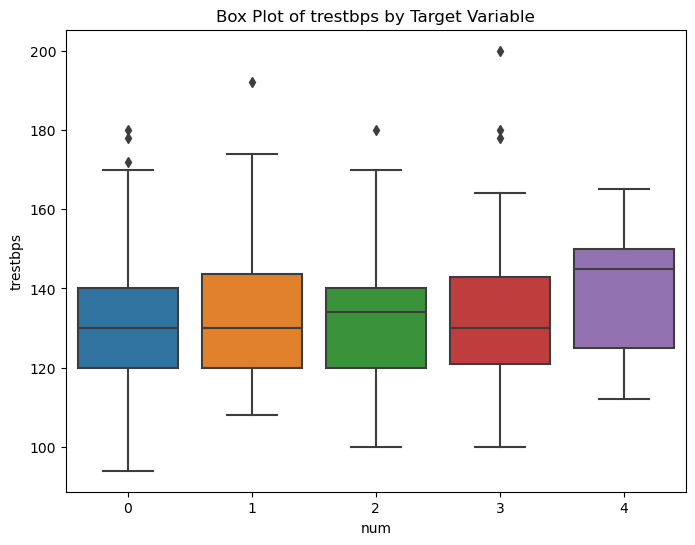

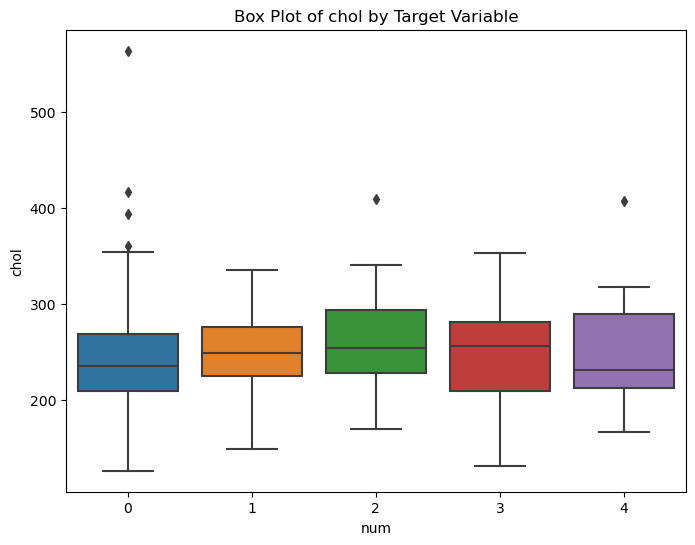

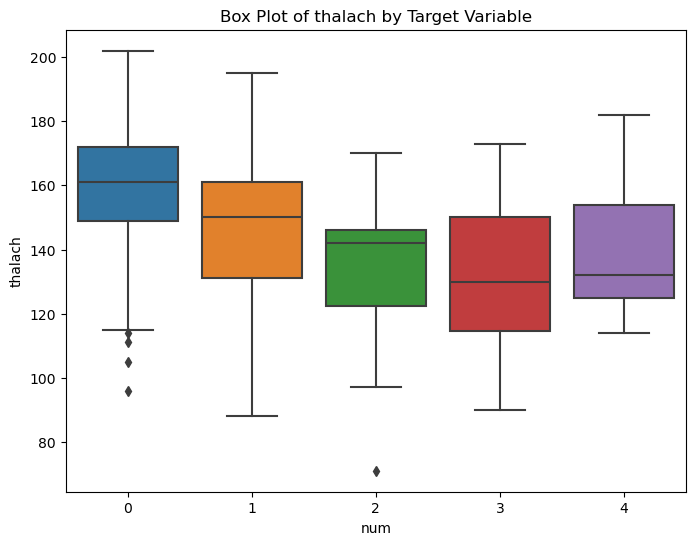

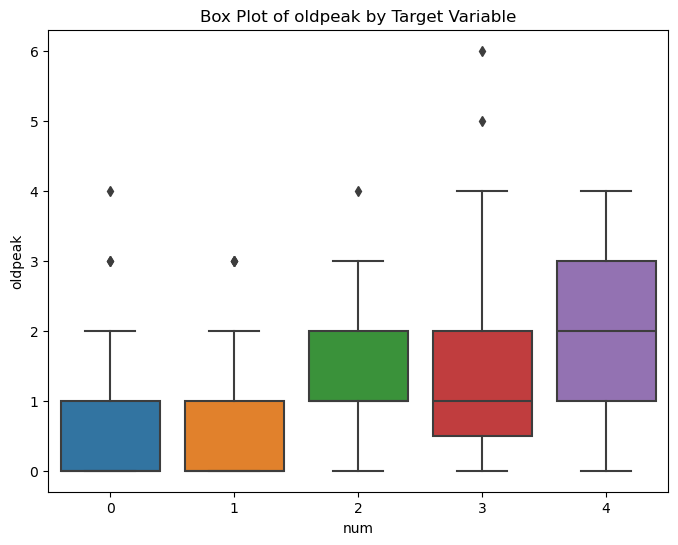

In [21]:
for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='num', y=feature, data=data)
    plt.title(f'Box Plot of {feature} by Target Variable')
    plt.show()

In [22]:
# ANOVA F-test
F_values, p_values = f_classif(X[continuous_features], y)

# Dataframe creation to display ANOVA F-test results
anova_df = pd.DataFrame({'Feature': continuous_features, 'F-value': F_values, 'p-value': p_values})
anova_df = anova_df.sort_values(by='F-value', ascending=False)

print(anova_df)

    Feature  F-value  p-value
4   oldpeak   25.572    0.000
3   thalach   19.539    0.000
0       age    4.903    0.001
1  trestbps    2.048    0.088
2      chol    0.871    0.481


Based on the Anova F value, P value and box plot visualisation, it’s evident that '**oldpeak**', '**thalach**' and '**age**' have significance with '**num**'

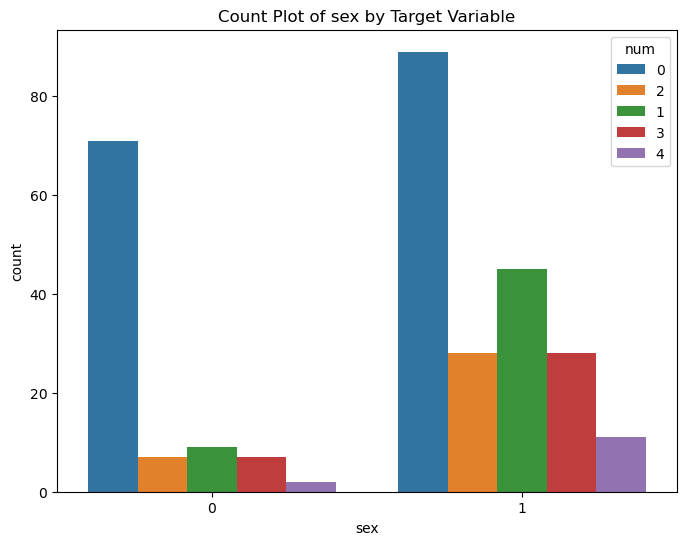

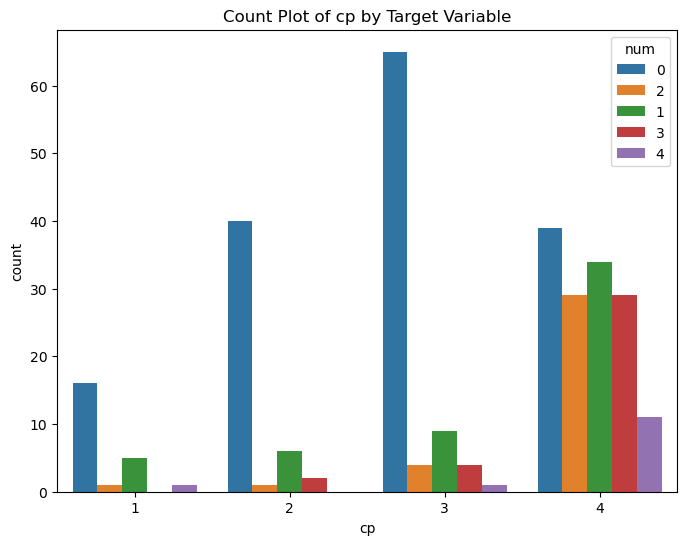

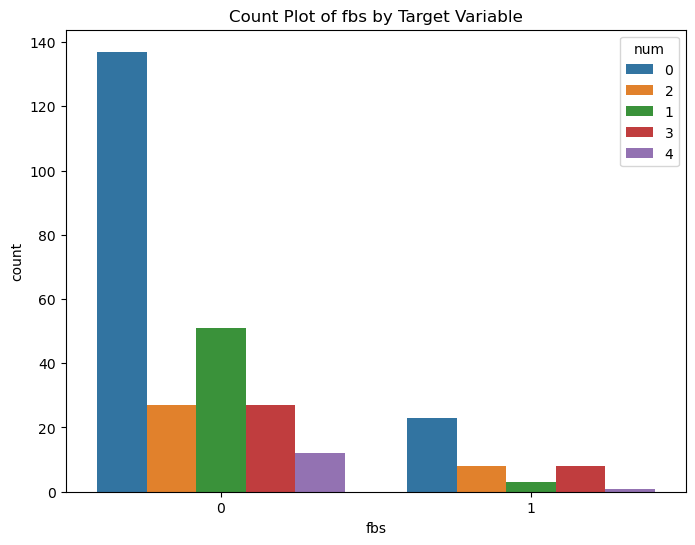

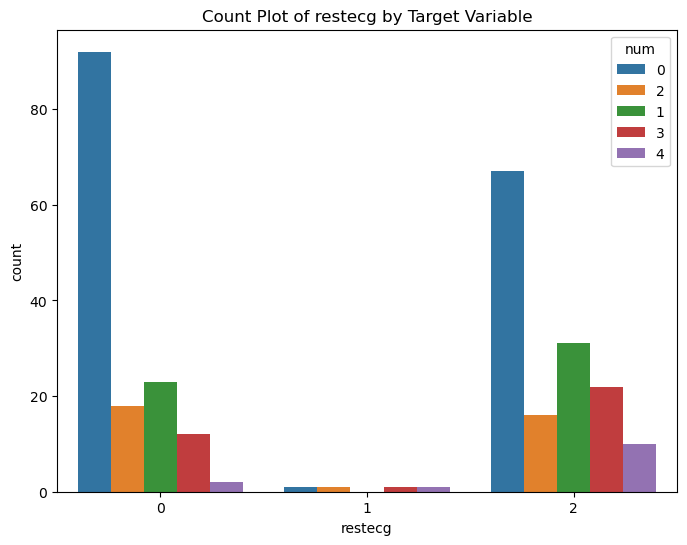

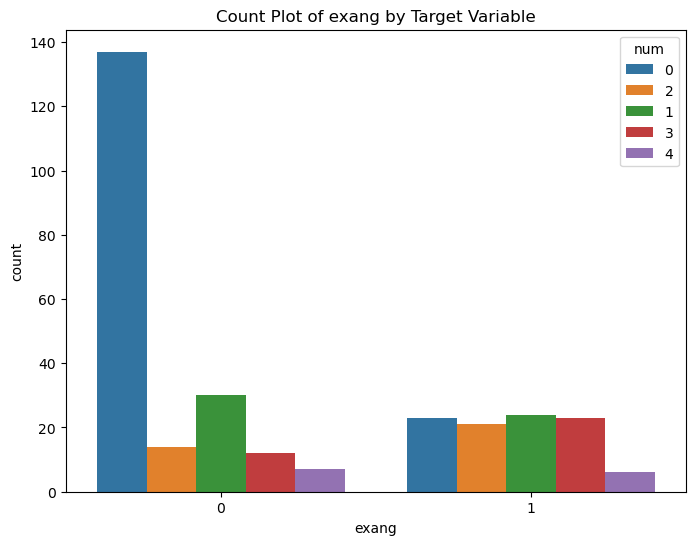

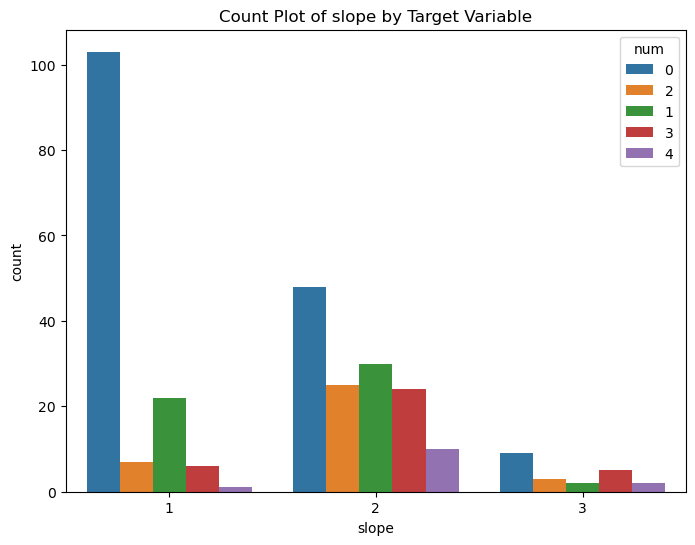

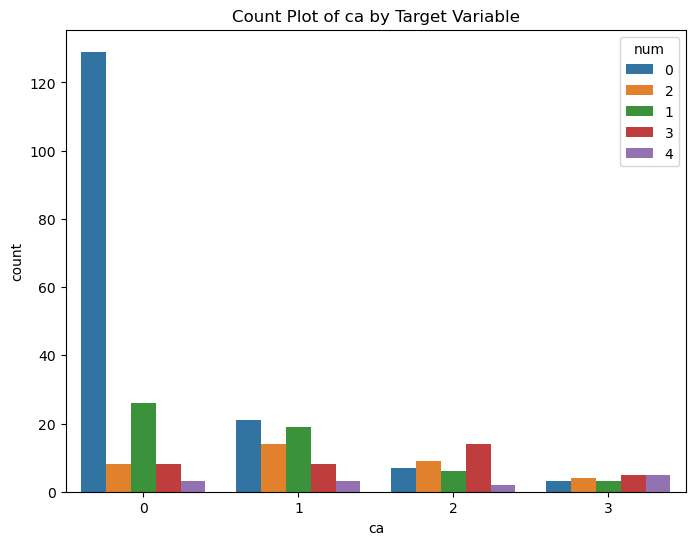

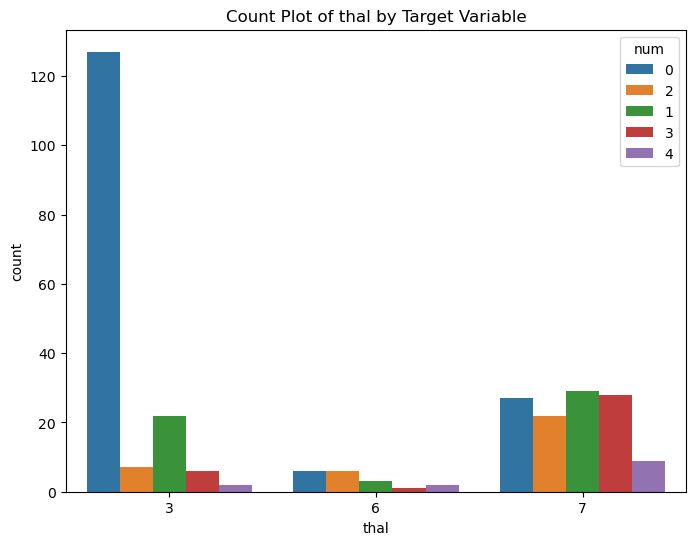

In [23]:
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue=data['num'].astype(str), data=data)
    plt.title(f'Count Plot of {feature} by Target Variable')
    plt.show()

In [24]:
# Encoding categorical features
X_categorical = X[categorical_features].apply(LabelEncoder().fit_transform)

# Chi-Squared test
chi2_scores, p_values = chi2(X_categorical, y)

# Dataframe creation to display Chi-Squared scores
chi2_df = pd.DataFrame({'Feature': categorical_features, 'Chi-Squared': chi2_scores, 'p-value': p_values})
chi2_df = chi2_df.sort_values(by='Chi-Squared', ascending=False)

print(chi2_df)

   Feature  Chi-Squared  p-value
6       ca      107.214    0.000
7     thal       95.028    0.000
4    exang       39.119    0.000
5    slope       27.067    0.000
1       cp       23.974    0.000
3  restecg       13.026    0.011
0      sex        7.512    0.111
2      fbs        6.778    0.148


As per the 'Chi-Squared' value, P value and barplot visualisation it’s evident that '**cp**', '**restecg**', '**exang**', '**slope**', '**ca**', '**thal**' have significance with '**num**'

# Analysing Target class-wise (Class 3 and 4) significance of important feature variables
*To confirm class 3 and 4 merging decision*

In [25]:
# Filtering data for classes 3 and 4
data_class_3 = data[data['num'] == 3]
data_class_4 = data[data['num'] == 4]

In [26]:
# List of key features in data_class_3 and data_class_4 DataFrames to analyse
key_features_continuous = ['age', 'thalach', 'oldpeak']
key_features_categorical = ['cp', 'restecg', 'exang', 'slope', 'ca', 'thal']

**Initialise results for continuous value**

In [27]:
# Statistical test results for continuous value
results_continuous = pd.DataFrame(columns=["Feature", "T-statistic", "P-value"])
# Iterate through key features to perform t-tests
for i, feature in enumerate(key_features_continuous):
    t_stat, p_value = ttest_ind(data_class_3[feature], data_class_4[feature])
    results_continuous.loc[len(results_continuous)] = [feature, t_stat, p_value]
print(results_continuous)

   Feature  T-statistic  P-value
0      age       -1.380    0.174
1  thalach       -1.198    0.237
2  oldpeak       -0.724    0.473


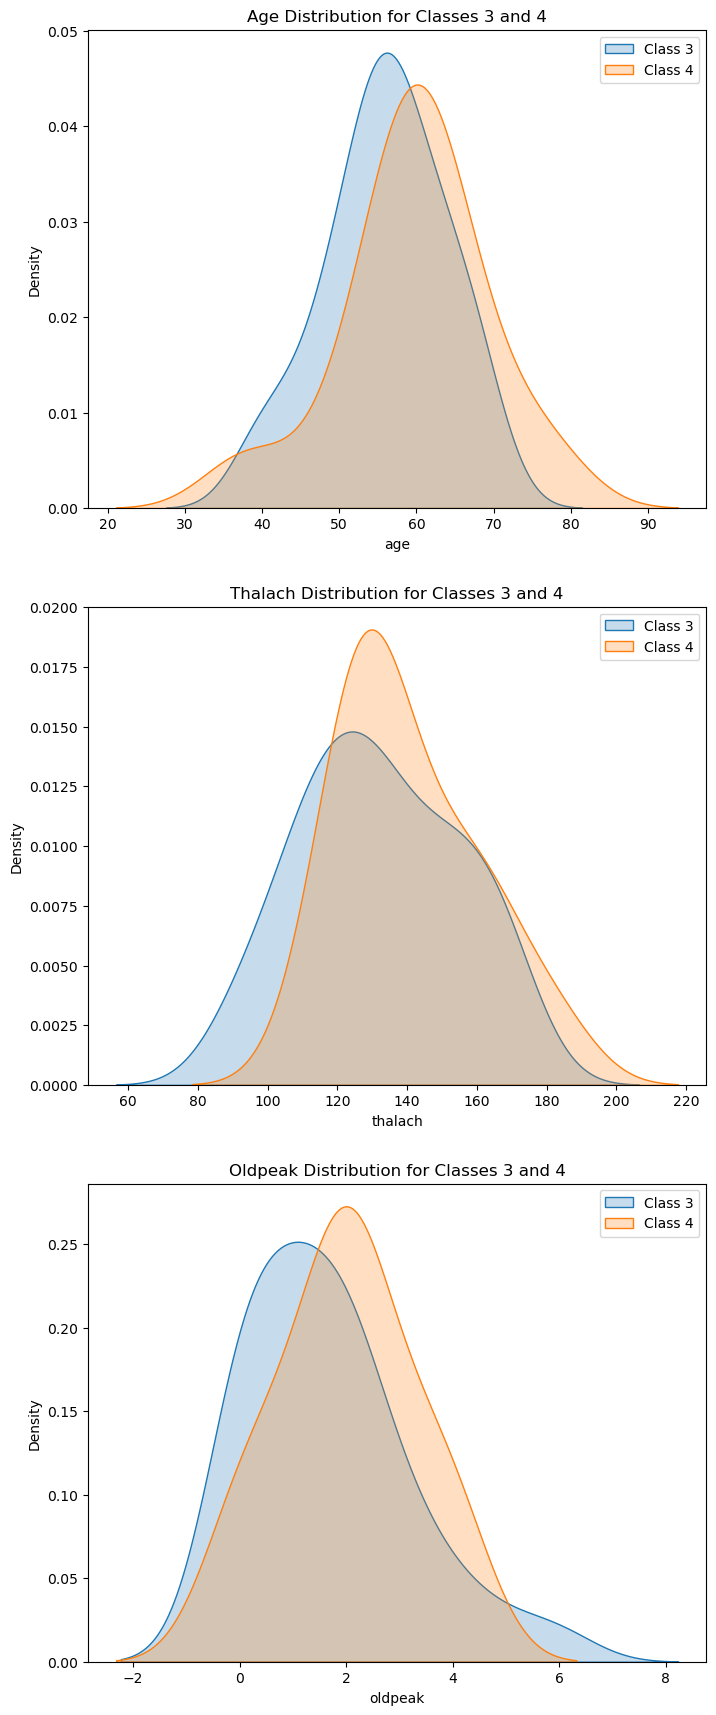

In [28]:
# Subplots
fig, axes = plt.subplots(len(key_features_continuous), 1, figsize=(8, 6 * len(key_features_continuous)))
fig.tight_layout(pad=5.0)

for i, feature in enumerate(key_features_continuous):
    sns.kdeplot(data_class_3[feature], label='Class 3', shade=True, ax=axes[i])
    sns.kdeplot(data_class_4[feature], label='Class 4', shade=True, ax=axes[i])
    axes[i].set_title(f'{feature.capitalize()} Distribution for Classes 3 and 4')
    axes[i].legend()
    
plt.show()

**Analysis:**

*age*: The p-value is 0.174, which is greater than 0.05, indicating no significant difference between Classes 3 and 4 for this feature.

*thalach*: The p-value is 0.237, which is greater than 0.05, indicating no significant difference between Classes 3 and 4 for this feature.

*oldpeak*: The p-value is 0.473, which is greater than 0.05, indicating no significant difference between Classes 3 and 4 for this feature.

**Conclusion:**

All the p-values for the continuous features are greater than 0.05, which suggests that there are no statistically significant differences between Classes 3 and 4 for any of these features. The distribution graphs also confirm the same. This lack of significant difference supports the justification for merging Classes 3 and 4. Merging these classes could simplify the analysis without losing important distinctions in the data, as the features do not show significant differences between the two classes.

**Initialise results for continuous value**

In [29]:
for feature in key_features_categorical:
    data[feature] = data[feature].astype('category') # Ensuring categorical features are of type 'category'

data['num'] = data['num'].astype('category') # Ensuring the class column is also of type 'category'

In [30]:
# Initialising results Dataframe
results_categorical = pd.DataFrame(columns=["Feature", "Chi2-statistic", "P-value"])

key_features_categorical = ['cp', 'restecg', 'exang', 'slope', 'ca', 'thal'] # Key categorical features defining 

for feature in key_features_categorical:
    combined_data = pd.concat([data_class_3, data_class_4])
    combined_data['class'] = ['Class 3'] * len(data_class_3) + ['Class 4'] * len(data_class_4)
    contingency_table = pd.crosstab(combined_data[feature], combined_data['class'])
    chi2, p = chi2_contingency(contingency_table)[:2]
    results_categorical = pd.concat([results_categorical, pd.DataFrame({"Feature": [feature], "Chi2-statistic": [chi2], "P-value": [p]})], ignore_index=True)

print("Categorical Features Results:")
print(results_categorical)

Categorical Features Results:
   Feature  Chi2-statistic  P-value
0       cp           3.566    0.312
1  restecg           1.974    0.373
2    exang           0.809    0.368
3    slope           0.682    0.711
4       ca           4.383    0.223
5     thal           2.540    0.281


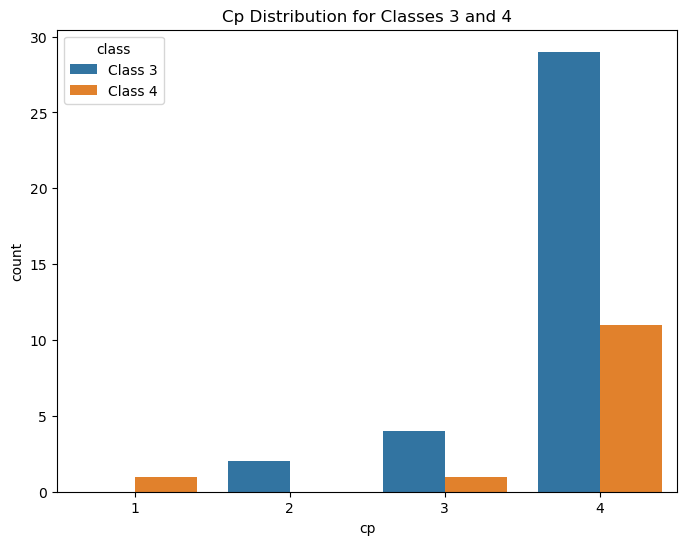

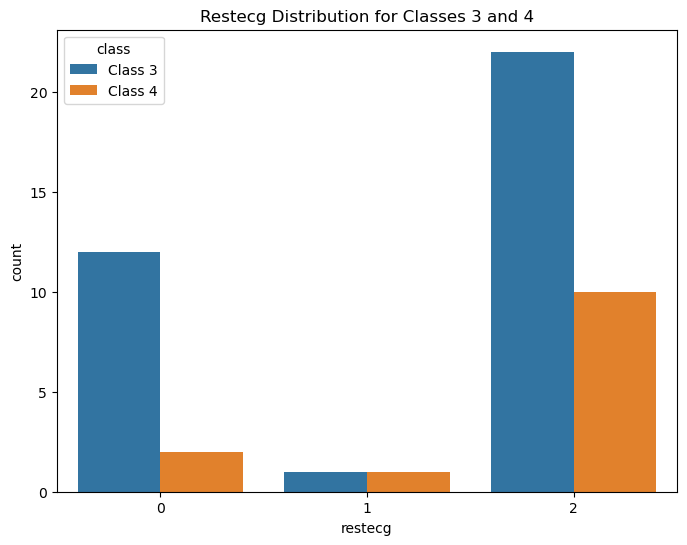

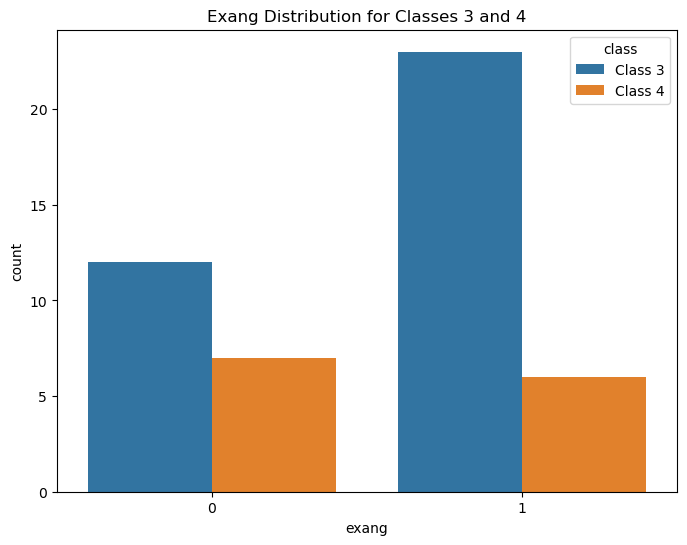

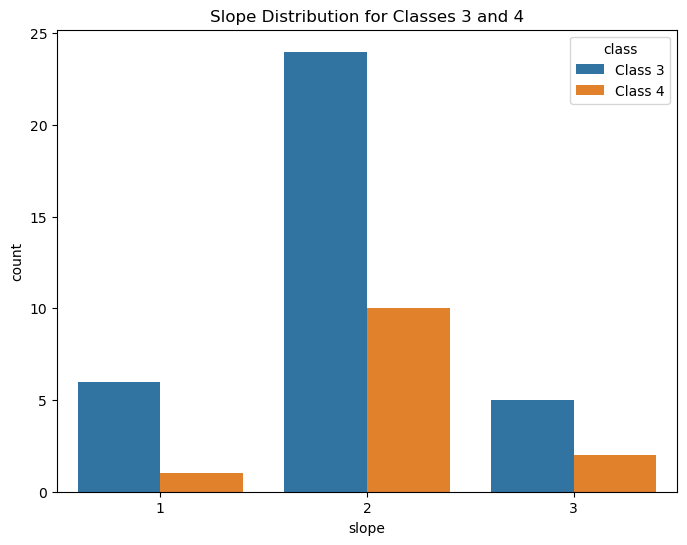

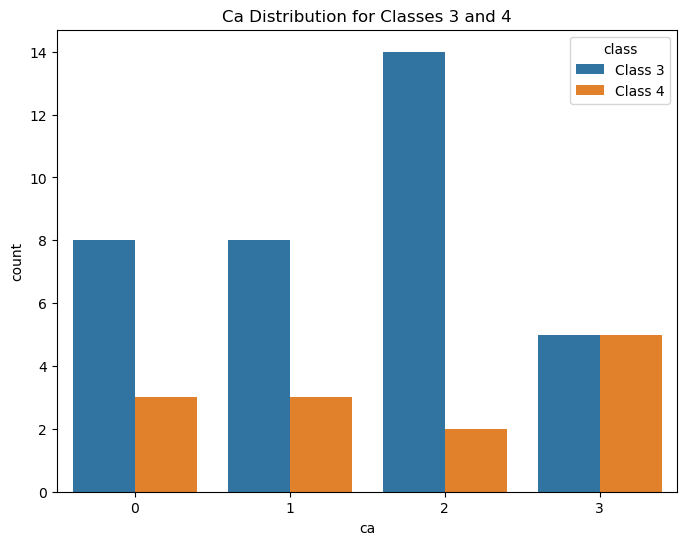

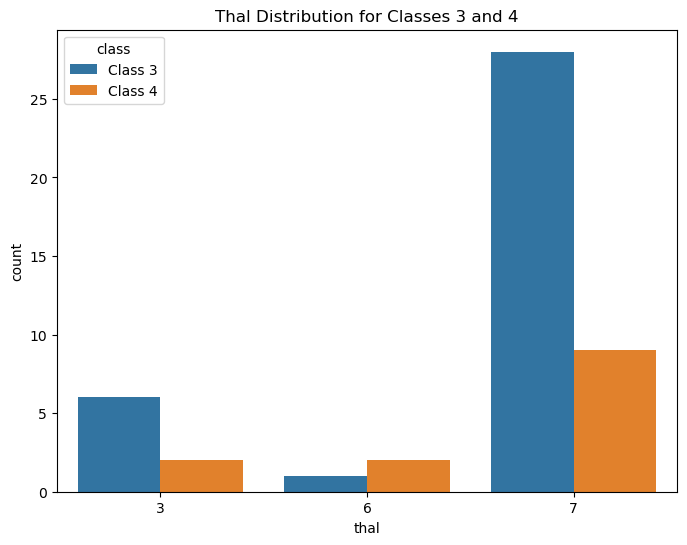

In [31]:
for feature in key_features_categorical:
    combined_data = pd.concat([data_class_3, data_class_4])
    combined_data['class'] = ['Class 3'] * len(data_class_3) + ['Class 4'] * len(data_class_4)
    
    # Plot distribution
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='class', data=combined_data)
    plt.title(f'{feature.capitalize()} Distribution for Classes 3 and 4')
    plt.show()

**Analysis:**

*cp*: The p-value is 0.312, which is greater than 0.05, indicating no significant difference between Classes 3 and 4 for this feature.

*restecg*: The p-value is 0.373, which is greater than 0.05, indicating no significant difference between Classes 3 and 4 for this feature.

*exang*: The p-value is 0.368, which is greater than 0.05, indicating no significant difference between Classes 3 and 4 for this feature.

*slope*: The p-value is 0.711, which is greater than 0.05, indicating no significant difference between Classes 3 and 4 for this feature.

*ca*: The p-value is 0.223, which is greater than 0.05, indicating no significant difference between Classes 3 and 4 for this feature.

*thal*: The p-value is 0.281, which is greater than 0.05, indicating no significant difference between Classes 3 and 4 for this feature.

**Conclusion:**

All the p-values for the categorical features are greater than 0.05, which suggests that there are no statistically significant differences between Classes 3 and 4 for any of these features. This lack of significant difference supports the justification for merging Classes 3 and 4. Merging these classes could simplify the analysis without losing important distinctions in the data, as the features do not show significant differences between the two classes.

# Merging Class 3 and 4

In [32]:
#value count of num column in original dataset
print(data['num'].value_counts())

num
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64


In [33]:
# Merging class 3 and 4 in the 'num' column with a single class 3
data['num'] = data['num'].replace({4: 3})

# Verifying the changes
print(data['num'].value_counts())

num
0    160
1     54
3     48
2     35
Name: count, dtype: int64


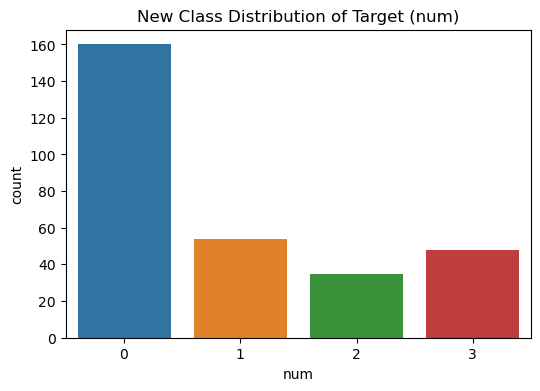

In [34]:
# Visualisation of the Distribution of Target column 'num' after merging classes 3 and 4 
plt.figure(figsize=(6, 4))
sns.countplot(x='num', data=data)
plt.title('New Class Distribution of Target (num)')
plt.show()

# Scaling and normalising updated data

In [35]:
data = pd.DataFrame(data)

In [36]:
# Function to cap outliers based on IQR
def cap_outliers(df, features, multiplier= 1.5):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])
        df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])
    return df

In [37]:
# Capping outliers from feature variables
data = cap_outliers(data, continuous_features, multiplier=1.5)

In [38]:
# Checking the shape of the data after removing outliers
print("Shape of data after capping outliers:", data.shape)

Shape of data after capping outliers: (297, 14)


In [39]:
# Split data
X = data.drop('num', axis=1)
y = data['num']

In [40]:
# Label encoding the categorical features
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [41]:
# Normalise the continuous features
scaler = MinMaxScaler()
data[continuous_features] = scaler.fit_transform(data[continuous_features])

In [42]:
print("Processed DataFrame:\n", data)

Processed DataFrame:
       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   0.708    1   0     0.671 0.432    1        2    0.561      0    0.800   
1   0.792    1   3     0.868 0.646    0        2    0.207      1    0.400   
2   0.792    1   3     0.342 0.416    0        2    0.384      1    0.800   
3   0.167    1   2     0.474 0.501    0        0    0.873      0    1.000   
4   0.250    0   1     0.474 0.315    0        2    0.747      0    0.400   
..    ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
297 0.583    0   3     0.605 0.465    0        0    0.333      1    0.000   
298 0.333    1   0     0.211 0.558    0        0    0.409      0    0.400   
299 0.812    1   3     0.658 0.271    1        0    0.485      0    1.000   
300 0.583    1   3     0.474 0.020    0        0    0.266      1    0.400   
301 0.583    0   1     0.474 0.444    0        2    0.764      0    0.000   

     slope  ca  thal num  
0        2   0     1   0  

In [43]:
# Applying Label Encoding to the target variable 'num' column with LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [44]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Convert NumPy array to pandas Series
y_train_series = pd.Series(y_train)

In [46]:
print("Before resampling:", Counter(y_train_series))

Before resampling: Counter({0: 124, 1: 45, 3: 38, 2: 30})


In [47]:
# Majority class defining (0)
majority_class_count = y_train_series.value_counts()[0]

In [48]:
# Define the sampling strategy to match all classes to the majority class count
sampling_strategy = {0: majority_class_count, 1: majority_class_count, 2: majority_class_count, 3: majority_class_count}

In [49]:
# Applying RandomOverSampler with the defined sampling strategy
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train_series)

In [50]:
# Checking class distribution after resampling
print("After resampling:", Counter(y_train_resampled))

After resampling: Counter({0: 124, 1: 124, 3: 124, 2: 124})


# Basic Model Implementation 

## Task 1. multiclass SVM

In [51]:
# SVM model Training
svm_model = SVC(kernel='poly', probability=True, random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

SVC(kernel='poly', probability=True, random_state=42)

In [52]:
# Predictions
y_pred_svm = svm_model.predict(X_test)

In [53]:
# Evaluation
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69        36
           1       0.22      0.22      0.22         9
           2       0.20      0.20      0.20         5
           3       0.30      0.30      0.30        10

    accuracy                           0.52        60
   macro avg       0.35      0.35      0.35        60
weighted avg       0.52      0.52      0.52        60

SVM Confusion Matrix:
 [[25  6  2  3]
 [ 4  2  1  2]
 [ 2  0  1  2]
 [ 5  1  1  3]]


In [54]:
# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy: {:.2f}%".format(accuracy_svm * 100))

SVM Accuracy: 51.67%


## Task 2. MLP classifier

In [55]:
# MLP model Training
mlp_model = MLPClassifier(hidden_layer_sizes=(25, 18, 10, 5), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp_model.fit(X_train_resampled, y_train_resampled)

MLPClassifier(hidden_layer_sizes=(25, 18, 10, 5), max_iter=500, random_state=42)

In [56]:
# Predictions
y_pred_mlp = mlp_model.predict(X_test)

In [57]:
# Evaluation
print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("MLP Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))

MLP Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.72      0.81        36
           1       0.15      0.22      0.18         9
           2       0.12      0.20      0.15         5
           3       0.36      0.40      0.38        10

    accuracy                           0.55        60
   macro avg       0.39      0.39      0.38        60
weighted avg       0.65      0.55      0.59        60

MLP Confusion Matrix:
 [[26  8  1  1]
 [ 2  2  3  2]
 [ 0  0  1  4]
 [ 0  3  3  4]]


In [58]:
# Accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("MLP Accuracy: {:.2f}%".format(accuracy_mlp * 100))

MLP Accuracy: 55.00%


**Comparative analytical graph of the results of the SVM and MLP model**

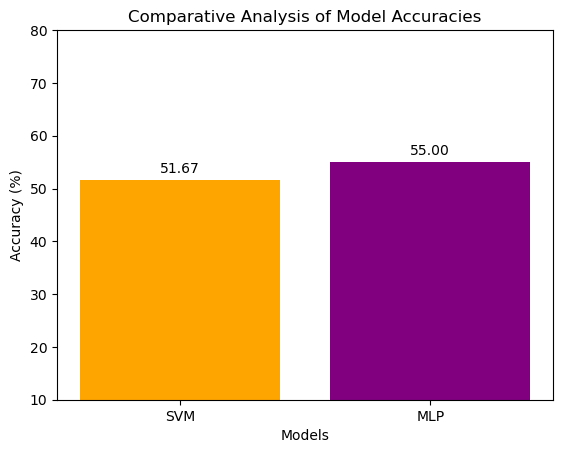

In [59]:
models = ['SVM', 'MLP']

# Accuracy values in percentage
accuracy_values = [accuracy_svm * 100, accuracy_mlp * 100]

fig, ax = plt.subplots()
bars = ax.bar(models, accuracy_values, color=['orange', 'purple', 'green'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparative Analysis of Model Accuracies')
plt.ylim(10, 80)
plt.show()

## Task 3: Deep CNN

In [60]:
# Reshaping data for CNN
X_train_cnn = X_train_resampled.to_numpy().reshape(X_train_resampled.shape[0], X_train_resampled.shape[1], 1)
X_test_cnn = X_test.to_numpy().reshape(X_test.shape[0], X_test.shape[1], 1)

In [61]:
# Building CNN model
cnn_model = Sequential([
    Conv1D(32, kernel_size=3, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=3, padding='same', activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

In [62]:
# Compile model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [63]:
# Assuming y_train and y_test are pandas Series, converting them to integer type
y_train_resampled = y_train_resampled.astype('int')
y_test = y_test.astype('int')

In [64]:
# Train model
cnn_model.fit(X_train_cnn, y_train_resampled, epochs=100, batch_size=32, validation_data=(X_test_cnn, y_test))

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.2163 - loss: 9.3636 - val_accuracy: 0.4333 - val_loss: 1.4056
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3154 - loss: 1.8492 - val_accuracy: 0.4167 - val_loss: 1.3732
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3512 - loss: 1.3806 - val_accuracy: 0.5667 - val_loss: 1.0423
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3851 - loss: 1.3535 - val_accuracy: 0.5000 - val_loss: 1.2290
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3794 - loss: 1.2930 - val_accuracy: 0.3333 - val_loss: 1.5033
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3662 - loss: 1.3524 - val_accuracy: 0.5167 - val_loss: 1.0817
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4074 - loss: 1.2668 - val_accuracy: 0.5500 - val_loss: 1.1675
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3722 - loss: 1.3241 - val_accuracy: 0.5833 - 

In [65]:
# Predictions
y_pred_cnn = np.argmax(cnn_model.predict(X_test_cnn), axis=-1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


In [66]:
# Evaluation
print("CNN Classification Report:\n", classification_report(y_test, y_pred_cnn))
print("CNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cnn))

CNN Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.82        36
           1       0.11      0.11      0.11         9
           2       0.33      0.40      0.36         5
           3       0.38      0.50      0.43        10

    accuracy                           0.60        60
   macro avg       0.43      0.45      0.43        60
weighted avg       0.63      0.60      0.61        60

CNN Confusion Matrix:
 [[28  5  1  2]
 [ 3  1  1  4]
 [ 0  1  2  2]
 [ 1  2  2  5]]


In [67]:
# Accuracy
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print("CNN Accuracy: {:.2f}%".format(accuracy_cnn * 100))

CNN Accuracy: 60.00%


**Comparative analytical graph of the results of the SVM, MLP and deep CNN model**

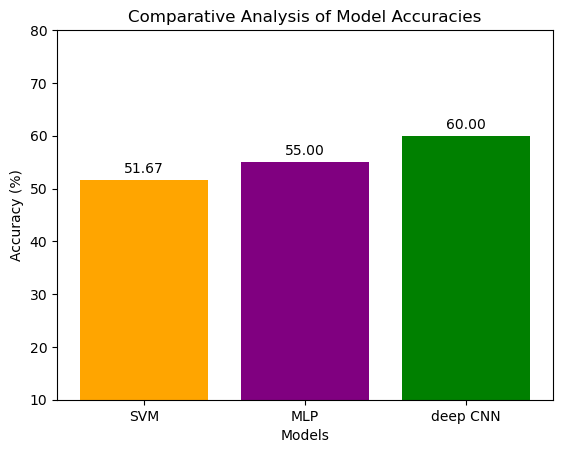

In [68]:
models = ['SVM', 'MLP', 'deep CNN']

# Accuracy values in percentage
accuracy_values = [accuracy_svm * 100, accuracy_mlp * 100, accuracy_cnn * 100]

fig, ax = plt.subplots()
bars = ax.bar(models, accuracy_values, color=['orange', 'purple', 'green'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparative Analysis of Model Accuracies')
plt.ylim(10, 80)
plt.show()

## Task 4. Clustering

In [69]:
# Determining the optimum number of clusters using the elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

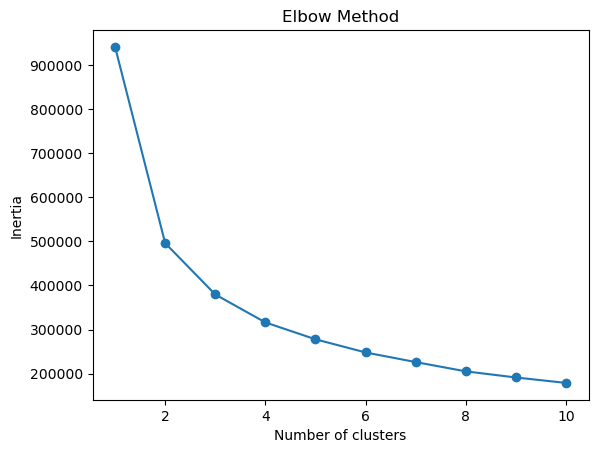

In [70]:
# Plot inertia to find the elbow point
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [71]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)
y_pred_kmeans = kmeans.predict(X_test)

In [72]:
# Evaluation
print("KMeans Adjusted Rand Index: {:.2f}".format(adjusted_rand_score(y_test, y_pred_kmeans)))

KMeans Adjusted Rand Index: -0.02


# Optimisation of Model using advanced AI techniques

In [73]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [74]:
# Display the shape of the split data
print("Training set shape: ", X_train.shape)
print("Test set shape: ", X_test.shape)
print("Training target shape: ", y_train.shape)
print("Test target shape: ", y_test.shape)

Training set shape:  (237, 13)
Test set shape:  (60, 13)
Training target shape:  (237,)
Test target shape:  (60,)


## Task 1. multiclass SVM

In [75]:
# pipeline with MinMaxScaler and SVM
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svm', SVC())
])

In [76]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [1, 0.1, 0.01, 0.001],
    'svm__kernel': ['linear', 'rbf', 'poly']
}

In [77]:
# Perform Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': [1, 0.1, 0.01, 0.001],
                         'svm__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [78]:
# Best model from grid search
best_svm = grid_search.best_estimator_

In [79]:
# Predictions on the training data
y_train_pred_svm = best_svm.predict(X_train_resampled)

# Training accuracy
train_accuracy_svm = accuracy_score(y_train_resampled, y_train_pred_svm)
print("Train set SVM Accuracy: {:.2f}%".format(train_accuracy_svm * 100))

Train set SVM Accuracy: 100.00%


In [80]:
y_pred_svm = best_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Test accuracy
print("Test set SVM Accuracy: {:.2f}%".format(accuracy_svm * 100))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

Test set SVM Accuracy: 91.67%
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.90      0.82      0.86        11
           2       0.88      1.00      0.93         7
           3       0.82      0.90      0.86        10

    accuracy                           0.92        60
   macro avg       0.89      0.91      0.90        60
weighted avg       0.92      0.92      0.92        60



## Task 2. MLP classifier

In [81]:
# Defining parameter grid
param_distributions = {
    'hidden_layer_sizes': [(50, 30, 20), (100, 50, 25), (25, 18, 10, 5)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

In [82]:
# Random Search
random_mlp = RandomizedSearchCV(MLPClassifier(max_iter=1000), param_distributions, n_iter=50, refit=True, verbose=3)
random_mlp.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 30, 20), learning_rate=constant, solver=adam;, score=0.840 total time=   1.6s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 30, 20), learning_rate=constant, solver=adam;, score=0.798 total time=   1.0s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 30, 20), learning_rate=constant, solver=adam;, score=0.808 total time=   0.9s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 30, 20), learning_rate=constant, solver=adam;, score=0.828 total time=   1.7s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 30, 20), learning_rate=constant, solver=adam;, score=0.808 total time=   1.4s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 30, 20), learning_rate=constant, solver=sgd;, score=0.250 total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 30, 2

RandomizedSearchCV(estimator=MLPClassifier(max_iter=1000), n_iter=50,
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'alpha': [0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [(50, 30, 20),
                                                               (100, 50, 25),
                                                               (25, 18, 10, 5)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['adam', 'sgd']},
                   verbose=3)

In [83]:
# Best parameters
print(f"Best parameters: {random_mlp.best_params_}")

Best parameters: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (100, 50, 25), 'alpha': 0.001, 'activation': 'tanh'}


In [84]:
# Predictions on the training data
y_train_pred_mlp = random_mlp.predict(X_train_resampled)

# Training accuracy
train_accuracy_mlp = accuracy_score(y_train_resampled, y_train_pred_mlp)
print("Train set MLP Accuracy: {:.2f}%".format(train_accuracy_mlp * 100))

Train set MLP Accuracy: 88.91%


In [85]:
# Predict and evaluate
y_pred_mlp = random_mlp.predict(X_test)

In [86]:
# Evaluation
print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("MLP Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))

MLP Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        32
           1       0.46      0.55      0.50        11
           2       0.86      0.86      0.86         7
           3       0.70      0.70      0.70        10

    accuracy                           0.77        60
   macro avg       0.73      0.74      0.73        60
weighted avg       0.78      0.77      0.77        60

MLP Confusion Matrix:
 [[27  4  0  1]
 [ 2  6  1  2]
 [ 0  1  6  0]
 [ 1  2  0  7]]


In [87]:
# Test accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Test set MLP Accuracy: {:.2f}%".format(accuracy_mlp * 100))

Test set MLP Accuracy: 76.67%


**Comparative analytical graph of the results of the SVM and MLP model**

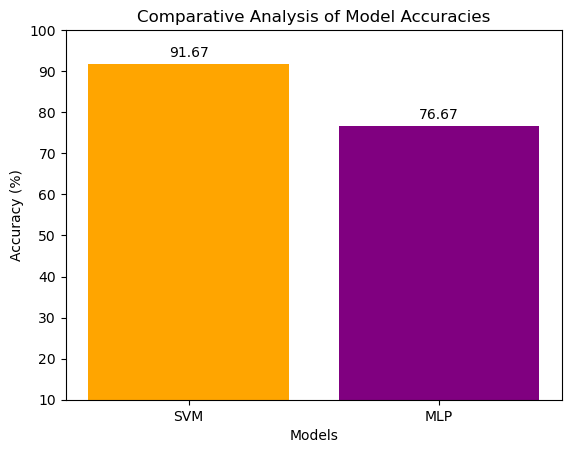

In [88]:
models = ['SVM', 'MLP']

# Accuracy values in percentage
accuracy_values = [accuracy_svm * 100, accuracy_mlp * 100]

fig, ax = plt.subplots()
bars = ax.bar(models, accuracy_values, color=['orange', 'purple'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparative Analysis of Model Accuracies')
plt.ylim(10, 100)
plt.show()

## Task 3. deep CNN

In [89]:
# Reshaping the data for CNN
X_resampled_cnn = np.array(X_train_resampled).reshape(X_train_resampled.shape[0], X_train_resampled.shape[1], 1, 1)
X_test_cnn = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1, 1)

In [90]:
# Building the CNN model with Batch Normalization
cnn = Sequential([
    Conv2D(32, kernel_size=(3, 1), activation='relu', padding='same', input_shape=(X_train_resampled.shape[1], 1, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 1)),
    
    Conv2D(64, kernel_size=(2, 1), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 1)),
    
    Conv2D(128, kernel_size=(2, 1), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 1)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

In [91]:
# Compile the model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [92]:
# Train the model
cnn.fit(X_resampled_cnn, y_train_resampled, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.3031 - loss: 1.6355 - val_accuracy: 0.0000e+00 - val_loss: 4.1610
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4783 - loss: 1.1608 - val_accuracy: 0.0000e+00 - val_loss: 3.1004
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4744 - loss: 1.1259 - val_accuracy: 0.0600 - val_loss: 2.0177
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5006 - loss: 1.0510 - val_accuracy: 0.1300 - val_loss: 1.9594
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5787 - loss: 0.9971 - val_accuracy: 0.1400 - val_loss: 1.6463
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5813 - loss: 0.9922 - val_accuracy: 0.1400 - val_loss: 1.8171
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6245 - loss: 0.8873 - val_accuracy: 0.1400 - val_loss: 1.4473
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6182 - loss: 0.8836 - val_accuracy

In [93]:
# Predictions on the training data
y_train_pred_cnn = np.argmax(cnn.predict(X_resampled_cnn), axis=1)

# Training accuracy
train_accuracy_cnn = accuracy_score(y_train_resampled, y_train_pred_cnn)
print("Train set deep CNN Accuracy: {:.2f}%".format(train_accuracy_cnn * 100))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Train set deep CNN Accuracy: 87.10%


In [94]:
# Evaluate the model
y_pred_cnn = np.argmax(cnn.predict(X_test_cnn), axis=1)
print("CNN Classification Report:\n", classification_report(y_test, y_pred_cnn))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
CNN Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92        32
           1       0.62      0.45      0.53        11
           2       0.83      0.71      0.77         7
           3       0.60      0.90      0.72        10

    accuracy                           0.80        60
   macro avg       0.75      0.74      0.73        60
weighted avg       0.81      0.80      0.80        60



In [95]:
# Test accuracy
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print("Test set deep CNN Accuracy: {:.2f}%".format(accuracy_cnn * 100))

Test set deep CNN Accuracy: 80.00%


**Comparative analytical graph of the results of the SVM, MLP and deep CNN model**

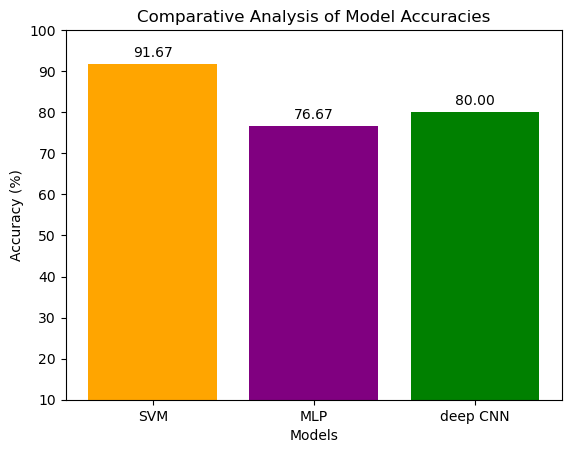

In [96]:
models = ['SVM', 'MLP', 'deep CNN']

# Accuracy values in percentage
accuracy_values = [accuracy_svm * 100, accuracy_mlp * 100, accuracy_cnn * 100]

fig, ax = plt.subplots()
bars = ax.bar(models, accuracy_values, color=['orange', 'purple', 'green'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparative Analysis of Model Accuracies')
plt.ylim(10, 100)
plt.show()

## Task 4. Clustering

In [97]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

In [98]:
# Determining the optimum number of clusters using the silhouette score
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_pca)
    labels = gmm.predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)

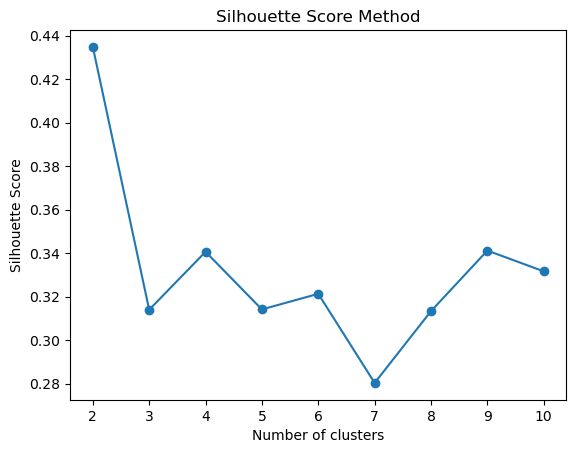

In [99]:
# Plotting silhouette scores to find the optimum number of clusters
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

In [100]:
# Based on the silhouette score, choosing the optimal number of clusters
optimal_clusters = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters based on Silhouette Score: {optimal_clusters}")

Optimal number of clusters based on Silhouette Score: 2


In [101]:
# Fitting Gaussian Mixture Model with the optimal number of clusters
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm.fit(X_pca)
y_pred_gmm = gmm.predict(X_pca)

In [102]:
# Evaluation using Adjusted Rand Index
print("Gaussian Mixture Model Adjusted Rand Index: {:.2f}".format(adjusted_rand_score(y, y_pred_gmm)))

Gaussian Mixture Model Adjusted Rand Index: 0.06


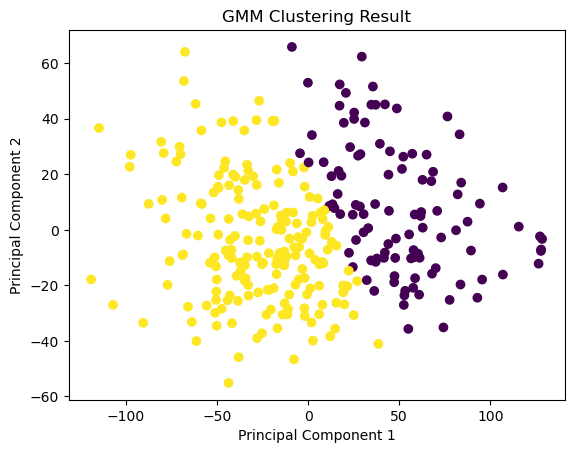

In [103]:
# Visualise the clustering result
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_gmm, cmap='viridis', marker='o')
plt.title('GMM Clustering Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()